In [1]:
import sys
import networkx as nx
from networkx.drawing.nx_pydot import read_dot
from networkx.drawing.nx_agraph import graphviz_layout
import os
from matplotlib import pyplot as plt


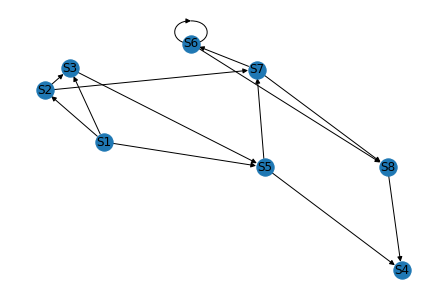

In [2]:
g = nx.DiGraph(read_dot("./graph/g1.dot"))
nx.draw(g, with_labels = True, arrows=True)

In [3]:
# g.edges.data()
# g['1']['2']['label']

In [4]:
g.in_degree

InDegreeView({'S1': 0, 'S2': 1, 'S3': 2, 'S5': 2, 'S4': 2, 'S8': 2, 'S6': 2, 'S7': 2})

In [5]:
def get_target_edges(graph, label):
    selected_edges = [(u,v) for u,v,e in graph.edges(data=True) if e['label'] == label]
    return selected_edges

In [6]:
def get_edge_label(graph):
    #     all_edge_dic = [(u,v) for u,v,e in graph.edges(data=True) if e['label'] == label]
    all_edge_labels = []
    all_edge_dic = {}
    for u,v,e in graph.edges(data=True):
        if e['label'] not in all_edge_labels:
            all_edge_labels.append(e['label'])        
            all_edge_dic[e['label']] = [[u,v]]
        else: 
            all_edge_dic[e['label']].append([u,v])
#             selected_edges.append((u,v))
    print (all_edge_dic)
    print (all_edge_labels)
    return all_edge_dic, all_edge_labels

In [7]:
all_edge_dic, all_edge_labels = get_edge_label(g)

{'a': [['S1', 'S2'], ['S1', 'S3'], ['S2', 'S3'], ['S5', 'S4'], ['S8', 'S4']], 'b': [['S1', 'S5'], ['S3', 'S5'], ['S6', 'S6'], ['S7', 'S6']], 'c': [['S2', 'S7'], ['S5', 'S7'], ['S6', 'S8'], ['S7', 'S8']]}
['a', 'b', 'c']


In [8]:
all_edge_dic

{'a': [['S1', 'S2'], ['S1', 'S3'], ['S2', 'S3'], ['S5', 'S4'], ['S8', 'S4']],
 'b': [['S1', 'S5'], ['S3', 'S5'], ['S6', 'S6'], ['S7', 'S6']],
 'c': [['S2', 'S7'], ['S5', 'S7'], ['S6', 'S8'], ['S7', 'S8']]}

In [9]:
def get_in_deg_0_node(graph): 
    in_deg_0_node_ls = []
    for n, in_deg in graph.in_degree:
        if in_deg == 0:
            in_deg_0_node_ls.append(n)
    print(in_deg_0_node_ls)

In [10]:
## Initialize the graph

In [11]:
in_deg_0_node_ls = get_in_deg_0_node(g)

['S1']


In [12]:
mapping = {}
acc_edge_len = 0

In [13]:
for edge_label, edges in all_edge_dic.items():
    cols = list(zip(*edges))
    acc_edge_len += len(set(cols[1]))    
    for edge in edges:
        print(edge)
        mapping[edge[1]] = 1+acc_edge_len
    print()

['S1', 'S2']
['S1', 'S3']
['S2', 'S3']
['S5', 'S4']
['S8', 'S4']

['S1', 'S5']
['S3', 'S5']
['S6', 'S6']
['S7', 'S6']

['S2', 'S7']
['S5', 'S7']
['S6', 'S8']
['S7', 'S8']



In [14]:
mapping

{'S2': 4, 'S3': 4, 'S4': 4, 'S5': 6, 'S6': 6, 'S7': 8, 'S8': 8}

In [15]:
g = nx.relabel_nodes(g, mapping, copy=False)
sorted(g, key=str)

[4, 6, 8, 'S1']

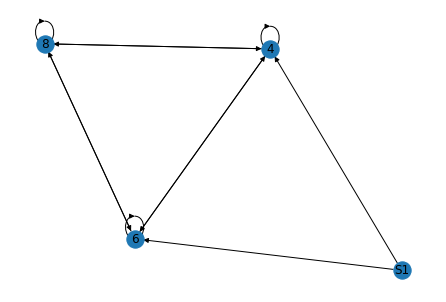

In [16]:
nx.draw(g, with_labels = True, arrows=True)

In [17]:
# g2 = g.edges.data("label", default="a")

In [24]:
g2

OutEdgeDataView([('1', '2', 'a'), ('1', '3', 'a'), ('1', '5', 'b'), ('2', '3', 'a'), ('2', '7', 'c'), ('3', '5', 'b'), ('5', '4', 'a'), ('5', '7', 'c'), ('8', '4', 'a'), ('6', '6', 'b'), ('6', '8', 'c'), ('7', '6', 'b'), ('7', '8', 'c')])

In [4]:
pos = graphviz_layout(g, prog='dot')

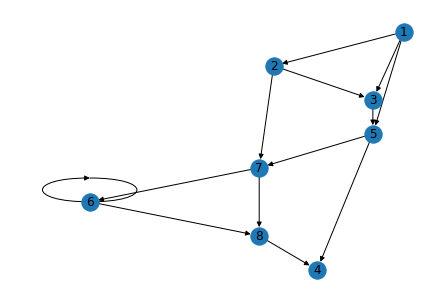

In [5]:
nx.draw(g, pos, with_labels=True, arrows=True)

In [7]:
# nx.draw_networkx_edges(g, pos)

In [31]:
G = nx.path_graph(3)

In [32]:
sorted(G)

[0, 1, 2]

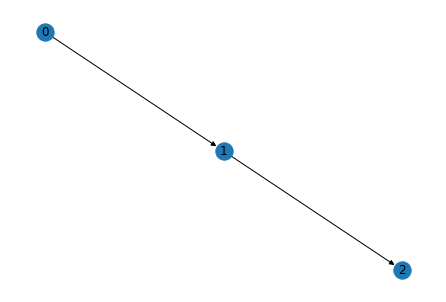

In [33]:
nx.draw(G, with_labels = True, arrows=True)

In [43]:
mapping = {0: "a", 1: "1", 2: "2"}
# mapping = {0: "a"}

In [44]:
H = nx.relabel_nodes(G, mapping)
sorted(H)

['1', '2', 'a']

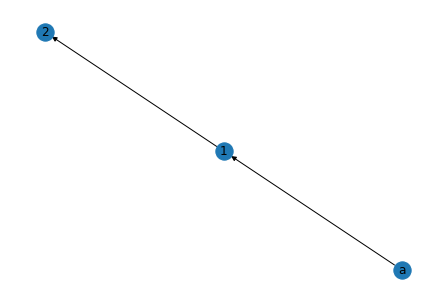

In [47]:
nx.draw(H, with_labels = True, arrows=True)

In [50]:
G = nx.path_graph(3)  # nodes 0-1-2

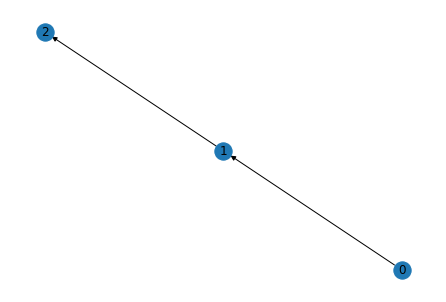

In [51]:
nx.draw(G, with_labels = True, arrows=True)

In [52]:
mapping = {0: "a", 1: "b"}  # 0->'a' and 1->'b'
G = nx.relabel_nodes(G, mapping, copy=False)
sorted(G, key=str)

[2, 'a', 'b']

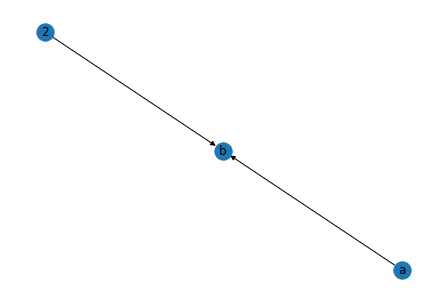

In [53]:
nx.draw(G, with_labels = True, arrows=True)